<table><tr>
<td> <img src="http://efeqt.eu/wp-content/uploads/2021/07/logo_sq.png" alt="Drawing", style="float:left;margin:0 10px 10px 0" markdown="1"/> </td>
</tr></table>

## Exercise sheet 1: Dynamics of qubits

Due on Monday, 25.10.2021

$\textbf{Author(s)}$

$\textbf{Exercise}$: EFEQT (http://efeqt.eu/)

$\textbf{Answer}$: M.Morgado (morgadovargas@unistra.fr)


---

In [1]:
# load standard libraries

import numpy as np   # standard numerics library

import scipy.linalg as LA   # useful linear algebra routines

import matplotlib.pyplot as plt   # for making plots

%matplotlib inline

---

#### Preamble


In [98]:
#constants
hbar = 1; #hbar normalization 

#1-qubit basis
ket_0 = np.array([1, 0]).reshape((2,1)); # ket |0> = [1, 0]
ket_1 = np.array([0, 1]).reshape((2,1)); # ket |1> = [0, 1]

#1-qubit operators
sigma_x = np.conjugate(ket_0) @ ket_1.T + np.conjugate(ket_1) @ ket_0.T; # Pauli X
sigma_z = np.conjugate(ket_0) @ ket_0.T - np.conjugate(ket_1) @ ket_1.T; # Pauli Z
sigma_y = 0.5j*(sigma_x@sigma_z-sigma_z@sigma_x); # Pauli Y
I2x2 = np.conjugate(ket_0) @ ket_0.T + np.conjugate(ket_1) @ ket_1.T; # Identity 2x2

#2-qubit operators
szsz = np.kron(sigma_z, sigma_z); # 2 partition operator of simultaneous sigma_z

#dynamical parameters
Omega =  2*np.pi*1.0; # Rabi-frequency
Delta = 2*np.pi*0.1; # Detuning
J = -2*np.pi*2.0; #interaction strength

#dynamical variables
time = np.linspace(0, 10, 500); # time in interval [0, 10] with 100 samples

In [3]:
ket_0

array([[1],
       [0]])

In [4]:
sigma_x

array([[0, 1],
       [1, 0]])

In [5]:
(ket_1.T@sigma_x@ket_0)[0][0]

1

### Exercise 1 : Quantum systems

Consider the single two-level system, or qubit, whose dynamics is governed by the Hamiltonian

\begin{equation*}
    \hat H=\frac{\Omega}{2}\hat\sigma_x ,\tag{1}
\end{equation*}

where $\Omega$ is real parameter called the Rabi-frequency. Calculate the time evolution of the probability $P_1(t)$ to find the qubit in state $|1\rangle$ as a function of time when the qubit was initially in state $|0\rangle$. Use three different methods to do so and check that you obtain the same result: 

1. Write the differential equation for the basis coefficients in the $\hat{\sigma}_z$ eigenbasis and solve this differential equation. 

2. Calculate eigenstates and eigenvalues and use them to calculate the time evolution (as shown in lecture video 1_2). 

3. Calculate the time evolution operator $\exp[-i\hat{H}t]$ analytically using the series expansion of the exponential and the properties of the Pauli-operators (they square to the identity).

In [6]:
#Hamiltonian
H = 0.5*(Omega * np.conjugate(ket_0) @ ket_1.T +
         np.conjugate(Omega) * np.conjugate(ket_1) @ ket_0.T); # Hamiltonian
H

array([[0.        , 3.14159265],
       [3.14159265, 0.        ]])

In [7]:
# Method 1 (ODE)

The idea is to now solve the Schrodinger equation:

\begin{equation*}
i\partial_{t} | \psi(t) \rangle = \hat{H}  | \psi(t) \rangle,\tag{A.1}
\end{equation*}

where the wavefunction can be writen as $| \psi(t) \rangle = \alpha(t)|0\rangle + \beta(t)|1\rangle$. In the matrix shape (i.e., numpy-arrays) this mean:

\begin{equation*}
\left(
\begin{matrix} 
\dot{\alpha}(t) \\ 
\dot{\beta}(t) 
\end{matrix} \right) = \frac{1}{2}\left(
\begin{matrix} 
0 & \Omega \\ 
\Omega^{*} & 0 
\end{matrix} \right)\left(
\begin{matrix} 
\alpha(t) \\ 
\beta(t)
\end{matrix} \right). \tag{A.2}
\end{equation*}

In the $\hat{\sigma}_{z}$ basis i.e., $\left\{ |0\rangle, |1\rangle\right\}$:

\begin{equation*}
\partial_{t} | \psi(t) \rangle = \left(\frac{\Omega}{2}|0\rangle\langle1| + \frac{\Omega^{*}}{2}|1\rangle\langle 0|\right)| \psi(t) \rangle,
\end{equation*}

this leads to:

\begin{equation*}
\partial_{t}\left( \alpha(t)|0\rangle + \beta(t)|1\rangle \right)= \left(\frac{\Omega}{2}|0\rangle\langle1| + \frac{\Omega^{*}}{2}|1\rangle\langle 0|\right)\left(\alpha(t)|0\rangle + \beta(t)|1\rangle\right).
\end{equation*}

By considering the orthonormallity of the eigenbasis of the system i.e., $\langle i | j\rangle = 0$ for $i,j \in \{0,1\}$ also that $\partial_{t} f(t) = \dot{f}(t)$ and $\left\{|0\rangle = \left(\begin{matrix}1\\0\end{matrix}\right), |1\rangle = \left(\begin{matrix}0\\1\end{matrix}\right)\right\}$ we can write:

\begin{align}
\Rightarrow\dot{\alpha}(t) \left( \begin{matrix} 1 \\ 0 \end{matrix}\right)+ \dot{\beta}(t) \left( \begin{matrix} 0 \\ 1 \end{matrix}\right) &= \frac{1}{2}\left[\Omega \beta(t)|0\rangle\langle1|1\rangle + \Omega^{*} \alpha(t)\langle 0 | 0 \rangle |1\rangle  \right] \\
\Rightarrow\dot{\alpha}(t) \left( \begin{matrix} 1 \\ 0 \end{matrix}\right)+\dot{\beta}(t) \left( \begin{matrix} 0 \\ 1 \end{matrix}\right) &= \frac{1}{2}\left[\Omega \beta(t) \left( \begin{matrix} 1 \\ 0 \end{matrix}\right) + \Omega^{*} \alpha(t) \left( \begin{matrix} 0 \\ 1 \end{matrix}\right)  \right]
\end{align}

Finally, assuming that the value of the Rabi's frequency belongs to Reals (i.e., $\Omega \in \mathbb{R}$) then the Hamiltonian can be written as:

$$
\hat{H} = \frac{\Omega}{2} \hat{\sigma}_{x},
$$

instead of 

$$
\hat{H} = \frac{1}{2} \left[ \text{Re}\{\Omega\}\hat{\sigma}_{x} + \text{Im}\{\Omega\}\hat{\sigma}_{y} \right]
$$

So, the final ODE system is:

\begin{cases}
\dot{\alpha}(t) = \frac{\Omega}{2} \beta(t)\\
\dot{\beta}(t) = \frac{\Omega}{2} \alpha(t)
\end{cases}

For the sack of solving the ODE system, one thing that we can try is to derivate the second equation and substitute the first one in new ODE. This, will lead to a 2nd order ODE which solution is harmonic i.e., periodic trigonometric functions such $cos(x)$ or $sin(x)$. Explicitly this is:


\begin{cases}
\dot{\alpha}(t) = \frac{\Omega}{2} \beta(t)\\
\ddot{\beta}(t) = \frac{\Omega}{2} \dot{\alpha}(t)
\end{cases}

thus:

\begin{equation*}
\ddot{\beta}(t) = \frac{\Omega^2}{4} \beta(t). \tag{A.3}
\end{equation*}

similarly for $\alpha(t)$, following that $\alpha(t)$ is the derivative of $\beta(t)$.

$\textbf{Reminder}$: if we normalize the wavefunction i.e., $|\psi (t)|^2 = 1$, then $\alpha^{2}(t)$ and $\beta^{2}(t)$ are amplitude probability.

(0.0, 1.0)

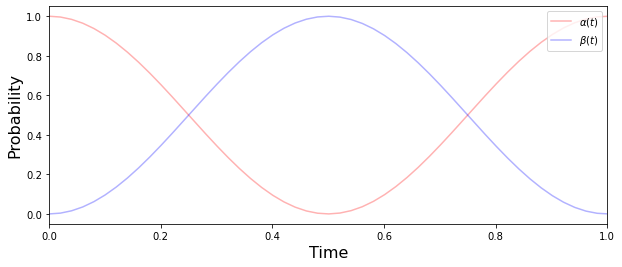

In [8]:
alpha_t = np.cos(0.5*Omega*time)**2; # probability of state |0>
beta_t = np.sin(0.5*Omega*time)**2; # probability of state |1>

plt.figure(figsize=(10,4));
plt.plot(time, alpha_t, color='red', alpha = 0.3, label=r'$\alpha(t)$');
plt.plot(time, beta_t, color='blue', alpha = 0.3, label=r'$\beta(t)$');
plt.ylabel(r'Probability', fontsize = 16);
plt.xlabel(r'Time', fontsize = 16);
plt.legend(loc=1);
plt.xlim(0,1)

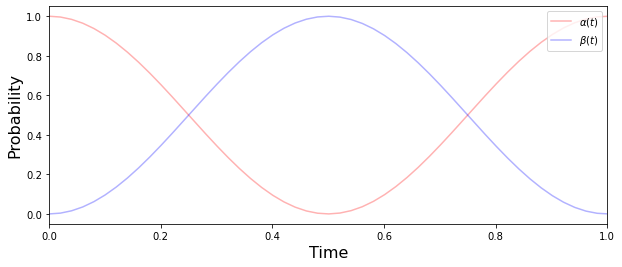

In [9]:
# Method 2 (Evolution operator)

eigenvals, eigenvectors = LA.eigh(H); # compute the eigenvalues and eigenvectors

#state evolution by computing projection of state in eigenbasis weighted by eigenvalue phase factor
def EvoOp(t, eigVals, eigVec, psi):
    return sum([np.exp(-1j*ei*t) * vi.reshape((2,1)) * (vi.reshape((2,1)).T @ psi)[0][0] for ei, vi in zip(eigVals, eigVec)])

sol = EvoOp(time, eigenvals, eigenvectors, ket_0); # solving by evolution

plt.figure(figsize=(10,4));
plt.plot(time, np.real(sol[0])**2, color='red', alpha = 0.3, label=r'$\alpha(t)$');
plt.plot(time, np.imag(sol[1])**2, color='blue', alpha = 0.3, label=r'$\beta(t)$');
plt.ylabel(r'Probability', fontsize = 16);
plt.xlabel(r'Time', fontsize = 16);
plt.legend(loc=1);
plt.xlim(0,1);

<div class="alert alert-block alert-danger">

**Note** : 
    
The way we built the kets and operators using the method ```.reshape()``` implies a change in the dimension of the array object. For this reason we need to unpack the constant value when we do inner operation between arrays such this: ```(vi.reshape((2,1)).T @ psi)[0][0]```

</div>

In [10]:
# Method 3 (Taylor expansion)

Using Taylor expansion series of the exponential:

\begin{equation*}
e^{x}=\sum _{n=0}^{\infty }{\frac {x^{n}}{n!}}=1+x+{\frac {x^{2}}{2!}}+{\frac {x^{3}}{3!}}+{\frac {x^{4}}{4!}}+\cdots \!
\end{equation*}

\begin{align}
e^{iHt}&=\mathbb{1}+{(iHt)}+{\frac {{(iHt)}^{2}}{2!}}+{\frac {{(iHt)}^{3}}{3!}}+{\frac {{(iHt)}^{4}}{4!}}+\cdots \! \\
e^{iHt}&=\mathbb{1}+iHt-{\frac {{(Ht)}^{2}}{2!}}-{\frac {{i(Ht)}^{3}}{3!}}+{\frac {{(Ht)}^{4}}{4!}}+\cdots \!\\
e^{iHt}&=\mathbb{1}+i\frac{\Omega}{2}\sigma_{x}t-{\frac {{(\frac{\Omega}{2}\sigma_{x}t)}^{2}}{2!}}-{\frac {{i(\frac{\Omega}{2}\sigma_{x}t)}^{3}}{3!}}+{\frac {{(\frac{\Omega}{2}\sigma_{x}t)}^{4}}{4!}}+\cdots \! \\
e^{iHt}&=\mathbb{1}+i\frac{\Omega}{2}\sigma_{x}t-{\frac {{\Omega^{2}\sigma_{x}^{2}t^{2}}}{4}}-{\frac {i\Omega^{3}\sigma_{x}t^{3}}{12}}+\cdots \!\\
e^{iHt}&=\mathbb{1}+i\frac{\Omega t}{2}\sigma_{x}-{\frac {{\Omega^{2}t^{2}}}{4}}\mathbb{1}-{\frac {i\Omega^{3}t^{3}}{12}}\sigma_{x}+\cdots \!\\
e^{iHt}&=\left(1-{\frac {{\Omega^{2}t^{2}}}{4}}\right)\mathbb{1} +i\frac{\Omega t}{2}\left(1 -\frac {\Omega^{2}t^{2}}{6}\right)\sigma_{x}+\cdots \!\\
\end{align}


---

### Exercise 2 : Quantum dynamics

Solve the problem from Exercise 1 numerically using the following methods:

1. Use the numpy function ```LA.expm()``` to numerically calculate the evolution operator at any given time.

2. Calculate the eigenvectors and eigenvalues of $\hat{H}$ (using ```LA.eigh()```) and use them to calculate the evolved state at a given time.

Plot the solutions for a grid of time in the inteval $[0,10]$.

To make this a bit more interesting, also consider the qubit Hamiltonian with an additional $\sigma_z$ term, or detuning term,

\begin{equation*}
    \hat H=\frac{\Omega}{2}\hat\sigma_x + \frac{\Delta}{2}\hat\sigma_z . \tag{2}
\end{equation*}

$\textbf{Remark}$: this Hamiltonian can be realized in all physical qubit systems, e.g., by driving a transition between the qubit state by applying external electromagnetic driving fields. The detuning term arises when the driving field frequency is not perfectly resonant with the transition frequency between the qubit states. You will learn more about this in the coming lectures.

How does the result depend on $\Delta$? 

$\textbf{Optional}$: Can you solve/guess the analytical solution for $P_1(t)$ with detuning?

You will find many useful numpy function in the Python tutorial from the first lecture.

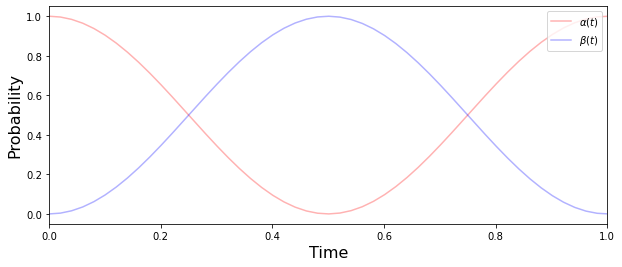

In [11]:
# Part 1

#Hamiltonian (eq.1)
H = 0.5*(Omega * np.conjugate(ket_0) @ ket_1.T +
         np.conjugate(Omega) * np.conjugate(ket_1) @ ket_0.T);

psi0 = ket_0; # initial state
psi_t = [ LA.expm(-1j*H*t)@psi0 for t in time]; # compute the U(t)|psi> for each time t

plt.figure(figsize=(10,4));
plt.plot(time, [np.real(psi[0])**2 for psi in psi_t], color='red', alpha = 0.3, label=r'$\alpha(t)$');
plt.plot(time, [np.imag(psi[1])**2 for psi in psi_t], color='blue', alpha = 0.3, label=r'$\beta(t)$');
plt.ylabel(r'Probability', fontsize = 16);
plt.xlabel(r'Time', fontsize = 16);
plt.legend(loc=1);
plt.xlim(0,1);

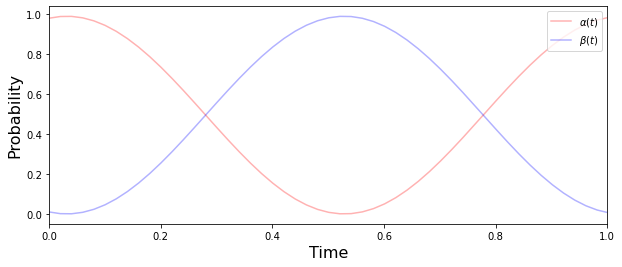

In [12]:
# Part 2

#Hamiltonian (eq.2)
H = 0.5*Omega*sigma_x + 0.5*Delta*sigma_y;

eigenvals, eigenvectors = LA.eigh(H); # compute the eigenvalues and eigenvectors
sol = EvoOp(time, eigenvals, eigenvectors, ket_0); # solving by evolution

plt.figure(figsize=(10,4));
plt.plot(time, np.real(sol[0])**2, color='red', alpha = 0.3, label=r'$\alpha(t)$');
plt.plot(time, np.imag(sol[1])**2, color='blue', alpha = 0.3, label=r'$\beta(t)$');
plt.ylabel(r'Probability', fontsize = 16);
plt.xlabel(r'Time', fontsize = 16);
plt.legend(loc=1);
plt.xlim(0,1);

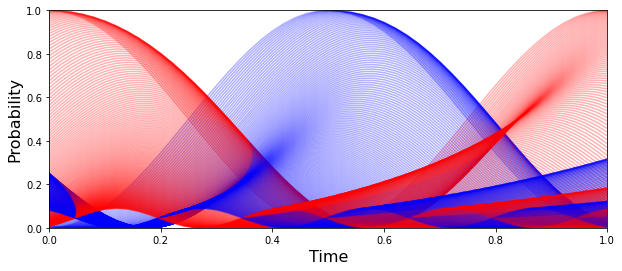

In [13]:
Delta_lst = np.linspace(0,20,200)

max_vals = []; # list of maxima of states' probabilities for each detuning
plt.figure(figsize=(10,4));

for delta in Delta_lst:
    
    H = 0.5*Omega*sigma_x + 0.5*delta*sigma_y; # Hamiltonian (eq.2)

    eigenvals, eigenvectors = LA.eigh(H); # compute the eigenvalues and eigenvectors
    sol = EvoOp(time, eigenvals, eigenvectors, ket_0); # solving by evolution

    plt.plot(time, np.real(sol[0])**2, color='red', alpha = 0.3, label=r'$\alpha(t)$'+r' $\Delta$'+str(delta));
    plt.plot(time, np.imag(sol[1])**2, color='blue', alpha = 0.3, label=r'$\beta(t)$'+r' $\Delta$'+str(delta));
    
    max_vals.append(np.max(np.real(sol[0])**2)); #storing max values of the solution
    
plt.ylabel(r'Probability', fontsize = 16);
plt.xlabel(r'Time', fontsize = 16);
# plt.legend(loc=1);
plt.xlim(0,1);
plt.ylim(0,1);

Text(0, 0.5, '$max\\left \\{ |\\langle 0 | 0\\rangle|^{2} \\right\\}$')

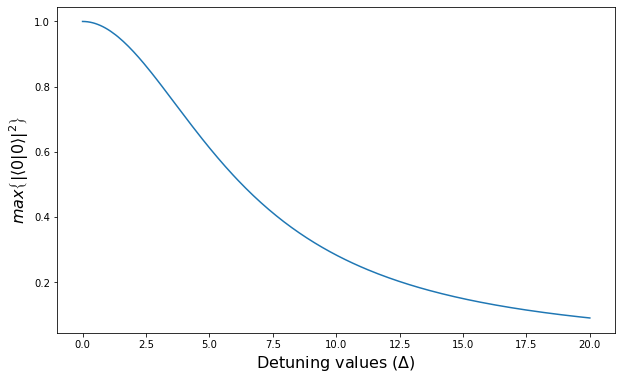

In [299]:
plt.figure(figsize=(10,6));
plt.plot(Delta_lst, max_vals);
plt.xlabel(r'Detuning values ($\Delta$)', fontsize=16);
plt.ylabel(r'$max\left \{ |\langle 0 | 0\rangle|^{2} \right\}$', fontsize=16)

You can check the book: ***"Laser cooling & trapping" by P.Metcalf & H. van der Stratenin the Chapter 1, Section 1.2.*** That derives the solution to:
        
\begin{equation*}
\Omega^{'} \equiv \sqrt{\Omega^{2} + \delta^{2}}
\end{equation*}

---

### Exercise 3 : Quantum communication (application)

We learned that the singlet state of two qubits can be used to demonstrate the EPR paradox. In fact, such states are a resource for quantum communication tasks. Assume that you have a device/experiment that can implement the Hamiltonian:

\begin{equation*}
\hat H=J\hat\sigma_z\otimes \hat\sigma_z , \tag{3}
\end{equation*}

as well as the single qubit Hamiltonian from above with arbitrarily tunable parameters $\Omega$, $\Delta$, $J$. You can apply the unitary evolution operators $U=\exp(-itH)$ with any of the Hamiltonians sequentially for arbitrary times $t$. How can one prepare a singlet state (up to a gobal phase) starting from both qubits in the state $|0\rangle$?

$\textbf{Remark}$: later in the course we will learn that this set of unitaries is universal in the sense that in can be used to synthesize any two-qubit unitary.

$\textbf{Hints}$:
There are three operations that need to be implemented.
    
1. The first operation can be found by thinking about which of the proposed gates will actually change the state.
2. Write down the state that you found after step 1. Which basis states would you now like to couple? Can you think of an operator that achieves this goal? How would you implement this operator with the given set of gates?
3. Finally, use single qubit gates to maximize the overlap.

In [204]:
#multiple tensor product from a list. Order of product goes from right to left.
def mkron(H_list:list):
    val=1;
    for index in range(len(H_list)-1, -1, -1):
        val = np.kron(val, H_list[index]);
    return val
    
#1-qubit Hamiltonian (eq.2)
def H1q(Omega, Delta, nrQubits=1, qubitNr=0):
    if nrQubits!=1:
        H_lst = [I2x2]*nrQubits; # creates a list of 2x2 operators (qubit partitions)
        H_lst[qubitNr] = 0.5*Omega*sigma_x + 0.5*Delta*sigma_y; # locate the single qubit Hamiltonian in qubit index
        return mkron(H_lst)
    else:
        return 0.5*Omega*sigma_x + 0.5*Delta*sigma_y

#2-qubit Hamiltonian (eq.3)
def H2q(J, nrQubits=2, qubit_i=0, qubit_j=1):
    H_lst = [I2x2]*nrQubits; # creates a list of 2x2 operators (qubit partitions)
    H_lst[qubit_i] = sigma_z; # locate the operator in qubit index i
    H_lst[qubit_j] = sigma_z; # locate the operator in qubit index j
    return J*mkron(H_lst)

#unitary operation from Hamiltonian
def unitary(Hamiltonian, dt):
    return LA.expm(-1j*Hamiltonian*dt)

#expectation value of arbitrary quantum state that must full-fit Hilbert space dimension of operator 'O'
def exp_value(psi, O):
    return np.conj(psi) @ O @ psi

In [ ]:
# Sequence example 1

In [279]:
H1 = H1q(1, 0, 2, 0); # Hamiltonian first operation
U1 = unitary(H1, Omega/2); # equivalent to X-gate in qubit 0

H2 = H2q(-1, 2, 0, 1) + H1q(1, 0, 2, 0) + H1q(1, 0, 2, 1); # Hamiltonian 2nd operation
U2 = unitary(H2, Omega/np.sqrt(2)); # equivalent to CX-gate with control qubit 0, taget qubit 1

U = U2@U1; # total unitary operation
psi0 = np.kron(ket_0, ket_0); # initial state
psi_f = np.round(U@psi0, 5); # final state 

psi_f

array([[ 0.     +0.j     ],
       [ 0.48195-0.36687j],
       [-0.48195-0.63313j],
       [ 0.     +0.j     ]])

In [303]:
U = U2@U1; # total unitary operation
psi0 = np.kron(ket_0, ket_1); # initial state
psi_f = np.round(U@psi0, 5); # final state 

psi_f

array([[-0.48195-0.36687j],
       [ 0.     -0.j     ],
       [ 0.     -0.j     ],
       [ 0.48195-0.63313j]])

In [304]:
U = U2@U1; # total unitary operation
psi0 = np.kron(ket_1, ket_0); # initial state
psi_f = np.round(U@psi0, 5); # final state 

psi_f

array([[ 0.48195-0.63313j],
       [ 0.     +0.j     ],
       [ 0.     +0.j     ],
       [-0.48195-0.36687j]])

In [305]:
U = U2@U1; # total unitary operation
psi0 = np.kron(ket_1, ket_1); # initial state
psi_f = np.round(U@psi0, 5); # final state 

psi_f

array([[ 0.     -0.j     ],
       [-0.48195-0.63313j],
       [ 0.48195-0.36687j],
       [ 0.     +0.j     ]])

<div class="alert alert-block alert-info">

**Bonus** : 
    
There is many ways to visualize multipartite quantum states:
    
1-Density matrix 

2-Quantum tomography

</div>

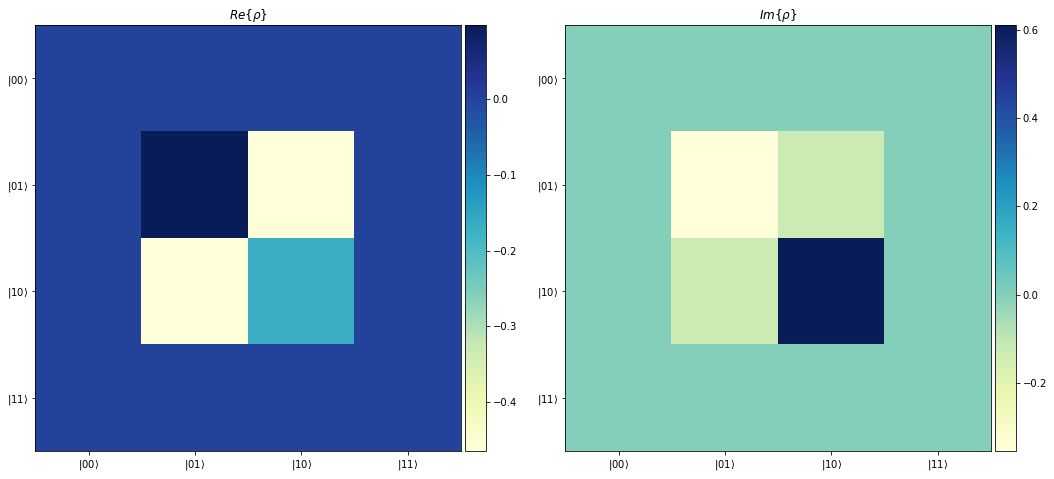

In [288]:
# plotting density matrix

rho = psi_f@psi_f.T; # density matrix of final state

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15));

im1 = ax1.imshow(np.real(rho), cmap='YlGnBu');
ax1.set_title(r'$ Re\{\rho\} $');
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05);
fig.colorbar(im1, cax=cax, orientation='vertical');

im2 = ax2.imshow(np.imag(rho), cmap='YlGnBu');
ax2.set_title(r'$ Im\{\rho\} $');
divider = make_axes_locatable(ax2);
cax = divider.append_axes('right', size='5%', pad=0.05);
fig.colorbar(im2, cax=cax, orientation='vertical');

state_label_list = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']

ax1.set_xticks(np.linspace(0,3,4))
ax1.set_yticks(np.linspace(0,3,4))
ax1.set_xticklabels(state_label_list)
ax1.set_yticklabels(state_label_list)

ax2.set_xticks(np.linspace(0,3,4))
ax2.set_yticks(np.linspace(0,3,4))
ax2.set_xticklabels(state_label_list)
ax2.set_yticklabels(state_label_list)

fig.tight_layout(pad=2.0);

In [ ]:
# Sequence example 2

In [314]:
H1 = H1q(1, 0, 2, 0); # Hamiltonian first operation
U1 = unitary(H1, Omega/2); # equivalent to X-gate in qubit 0

H2 = H1q(1, 0, 2, 1); # Hamiltonian first operation
U2 = unitary(H2, Omega*np.pi/2); # equivalent to X-gate in qubit 0

H3 = H2q(-1, 2, 0, 1); # Hamiltonian 2nd operation
U3 = unitary(H3, Omega*np.pi/2); # equivalent to CX-gate with control qubit 0, taget qubit 1

U = U3@U2@U1; # total unitary operation
psi0 = np.kron(ket_0, ket_0); # initial state
psi_f = np.round(U@psi0, 2); # final state 

psi_f

array([[ 0.  +0.j  ],
       [ 0.09+0.2j ],
       [ 0.  +0.j  ],
       [-0.88-0.42j]])

---

# Versions

In [16]:
#libs summary
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins', 'builtins', 'numpy', 'scipy.linalg', 'matplotlib.pyplot', 'types']